# Trade Generator

In [1]:
import pandas as pd
import numpy as np
from portfolio_optimization.portfolio.trade_generator import *
from portfolio_optimization.portfolio.cross_chain_trade import *

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

def read_debug_json(strategy="alpha"):
    # Read the debug.json file
    with open("/Users/arguiot/Downloads/response_1736458024813.json", "r") as f:
        data = json.load(f)

    # Get the debug data for the specified strategy
    debug_data = data["debug"][strategy]
    inputs = debug_data["inputs"]
    asset_list = debug_data["asset_list"]
    chain_list = debug_data["chain_list"]

    # Extract inputs in the correct format
    inputs = {
        "n_assets": inputs["n_assets"],
        "n_networks": inputs["n_networks"],
        "alphas": np.array(inputs["alphas"], dtype=float),
        "target_weights": np.array(inputs["target_weights"], dtype=float),
        "wealth_value": np.array(inputs["wealth_value"], dtype=float),
        "chis": np.array(inputs["chis"], dtype=float),
        "projected_portfolio_values": np.array(
            inputs["projected_portfolio_values"], dtype=float
        ),
        "external_movements": np.array(inputs["external_movements"], dtype=float),
        "priority_queue": np.array(inputs["priority_queue"], dtype=int),
        "beta_in": inputs["beta_in"],
        "beta_out": inputs["beta_out"],
        "asset_list": asset_list,
        "chain_list": chain_list,
        "prices": debug_data["prices"],
    }

    return inputs, data["generated_trades"][strategy]

# Example usage:
inputs, trades = read_debug_json("alpha")  # or 'beta' or 'gamma'

# Call the function with the extracted inputs
(
    status,
    optimal_wealth_value,
    optimal_bridges,
    output_weights,
    output_weights_min,
    output_weights_max,
) = optimal_wealth_trades_complete(
    n_assets=inputs["n_assets"],
    n_networks=inputs["n_networks"],
    alphas=inputs["alphas"],
    target_weights=inputs["target_weights"],
    wealth_value=inputs["wealth_value"],
    chis=inputs["chis"],
    projected_portfolio_values=inputs["projected_portfolio_values"],
    external_movements=inputs["external_movements"],
    priority_queue=inputs["priority_queue"],
    beta_in=inputs["beta_in"],
    beta_out=inputs["beta_out"],
)

# Print the Chis as a table, with asset name as column headers, using pandas
chis_df = pd.DataFrame(inputs["chis"], columns=inputs["asset_list"])

     pcost       dcost       gap    pres   dres
 0: -1.7389e+07 -1.4725e+08  5e+08  7e-01  6e+00
 1: -1.6384e+07 -5.5507e+07  8e+07  8e-02  6e-01
 2: -1.4703e+07 -2.2792e+07  1e+07  1e-02  7e-02
 3: -1.4610e+07 -1.5287e+07  9e+05  6e-04  4e-03
 4: -1.4741e+07 -1.4831e+07  1e+05  7e-05  5e-04
 5: -1.4760e+07 -1.4765e+07  6e+03  2e-06  2e-05
 6: -1.4761e+07 -1.4761e+07  3e+02  5e-08  4e-07
 7: -1.4761e+07 -1.4761e+07  1e+01  6e-10  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7222e+07 -1.4662e+08  5e+08  7e-01  6e+00
 1: -1.6085e+07 -5.5423e+07  8e+07  8e-02  6e-01
 2: -1.4650e+07 -2.2582e+07  1e+07  9e-03  7e-02
 3: -1.4618e+07 -1.5241e+07  8e+05  6e-04  4e-03
 4: -1.4741e+07 -1.4826e+07  1e+05  7e-05  5e-04
 5: -1.4760e+07 -1.4765e+07  6e+03  3e-06  2e-05
 6: -1.4761e+07 -1.4761e+07  3e+02  5e-08  4e-07
 7: -1.4761e+07 -1.4761e+07  9e+00  6e-10  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7028e+07 -1.4587e

In [3]:
chis_df.T

,0,1,2
avax,0.0,1.0,1.0
bnb,1.0,1.0,0.0
btcb,0.0,1.0,0.0
eth,1.0,1.0,0.0
ftm,1.0,1.0,0.0
inj,1.0,1.0,0.0
kas,1.0,1.0,1.0
link,1.0,1.0,1.0
matic,1.0,1.0,1.0
mkr,1.0,1.0,1.0



Status: Success

Projected Portfolio Values: [12660.9515459  20640.33254738 11179.83563182]

External Movements: [0. 0. 0.]

Optimal Bridges: [ 3.55680640e-09 -3.80484155e-09  2.47382559e-10]

Trade Analysis:

Chain: bsc
avax: -20.9366
bnb: -0.4058
btcb: 0.0431
eth: 0.4679
ftm: 116.4563
inj: 2.8004
kas: -7544.5489
link: -15.9151
mkr: -0.6938
near: 11.4009
pendle: -307.1061
sol: -4.9412
ton: -54.7004
usdt: -1.3360

Chain: pol
avax: 22.9037
kas: 8016.6950
link: 19.9473
matic: -15.8786
mkr: 0.8494
rndr: 14.0633
sol: 5.6648
usdc: -0.2895
wbtc: -0.0329
weth: -0.4630

Chain: eth
pendle: 307.6783
wbtc: -0.0138

Relative Deviations:
avax: 5.00%
bnb: 5.00%
btcb: 0.64%
eth: 5.00%
ftm: 0.39%
inj: 5.00%
kas: 5.00%
link: 5.00%
matic: inf%
mkr: 5.00%
near: 1.52%
ondo: 2.53%
pendle: 5.00%
rndr: 5.00%
sol: 5.00%
ton: 4.79%
usdc: inf%
usdt: inf%
wbnb: inf%
wbtc: inf%
weth: inf%
wmatic: inf%


/var/folders/d2/1qh2h9ys19z3375prb_0cb8w0000gn/T/ipykernel_14611/1769701955.py:42: RuntimeWarning: divide by zero encountered in divide
  np.abs(output_weights - inputs["target_weights"]) / inputs["target_weights"]


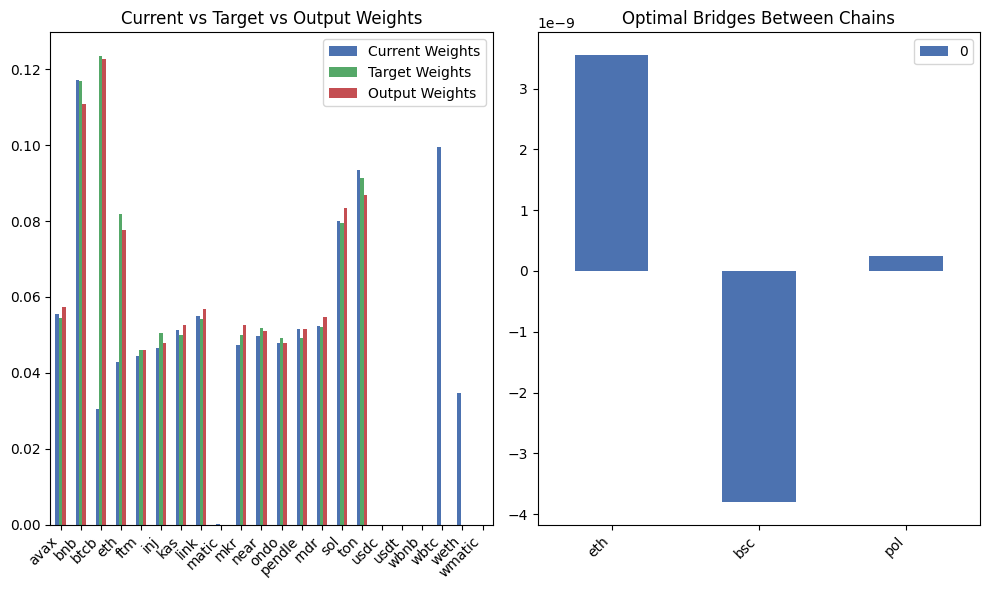

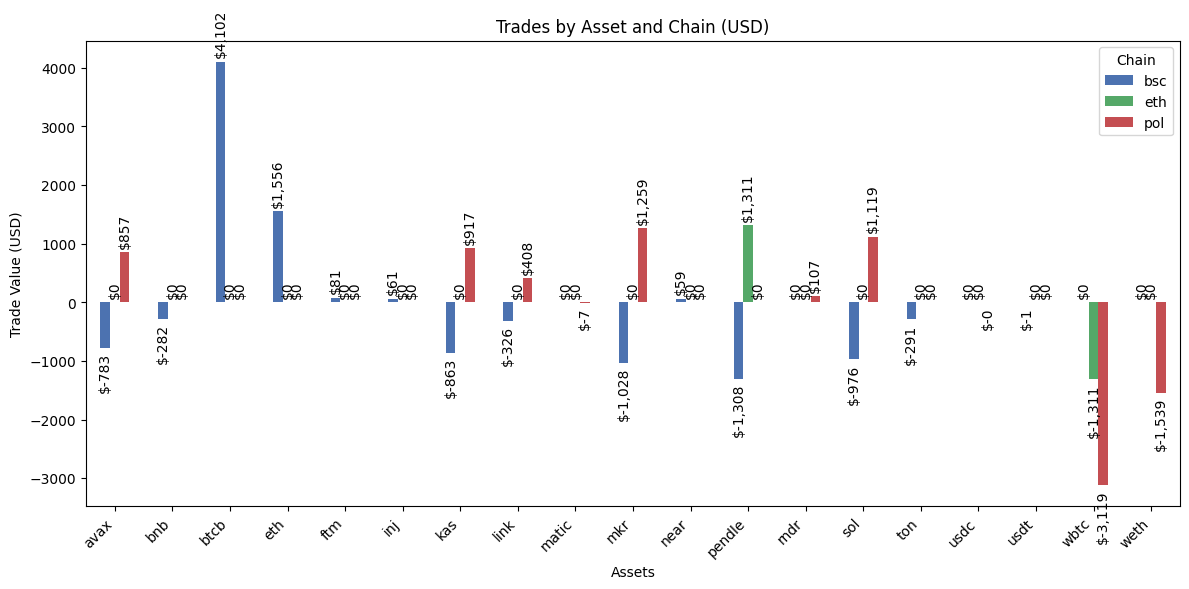

In [6]:
# Create visualization of the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot 1: Compare target weights vs output weights
weights_df = pd.DataFrame(
    {
        "Current Weights": np.sum(inputs["wealth_value"], axis=0) / np.sum(inputs["wealth_value"]),
        "Target Weights": inputs["target_weights"],
        "Output Weights": output_weights,
    },
    index=inputs["asset_list"],
)

weights_df.plot(kind="bar", ax=ax1)
ax1.set_title("Current vs Target vs Output Weights")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Plot 2: Optimal bridges between chains
bridges_df = pd.DataFrame(optimal_bridges, index=inputs["chain_list"])
bridges_df.plot(kind="bar", ax=ax2)
ax2.set_title("Optimal Bridges Between Chains")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()

# Print detailed analysis
print("\nStatus:", "Success" if status else "Failed")
print("\nProjected Portfolio Values:", inputs["projected_portfolio_values"])
print("\nExternal Movements:", inputs["external_movements"])
print("\nOptimal Bridges:", optimal_bridges)

# Compare generated trades with optimal wealth value
print("\nTrade Analysis:")
for chain in trades:
    print(f"\nChain: {chain}")
    for asset, details in trades[chain].items():
        size = float(details["size"]) if details["size"] else 0
        print(f"{asset}: {size:.4f}")

# Calculate and display relative deviations
relative_dev = (
    np.abs(output_weights - inputs["target_weights"]) / inputs["target_weights"]
)
print("\nRelative Deviations:")
for asset, dev in zip(inputs["asset_list"], relative_dev):
    if not np.isnan(dev):
        print(f"{asset}: {dev:.2%}")

# Create visualization of trades in USD
trades_usd = {}
for chain in trades:
    trades_usd[chain] = {}
    for asset, details in trades[chain].items():
        size = float(details["size"]) if details["size"] else 0
        # Get price for this asset
        asset_idx = inputs["asset_list"].index(asset)
        price = float(inputs["prices"][asset_idx])
        trades_usd[chain][asset] = size * price

# Create a DataFrame for visualization
trades_data = []
for chain in trades_usd:
    for asset, value in trades_usd[chain].items():
        trades_data.append({
            'Chain': chain,
            'Asset': asset,
            'USD Value': value
        })
trades_df = pd.DataFrame(trades_data)

# Create a new figure for trades visualization
plt.figure(figsize=(12, 6))
ax3 = plt.gca()

# Plot trades as a grouped bar chart
trades_pivot = trades_df.pivot(index='Asset', columns='Chain', values='USD Value')
trades_pivot.plot(kind='bar', ax=ax3)
ax3.set_title('Trades by Asset and Chain (USD)')
ax3.set_xlabel('Assets')
ax3.set_ylabel('Trade Value (USD)')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Add value labels on bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='${:,.0f}', rotation=90, padding=3)

plt.tight_layout()

